<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_python_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

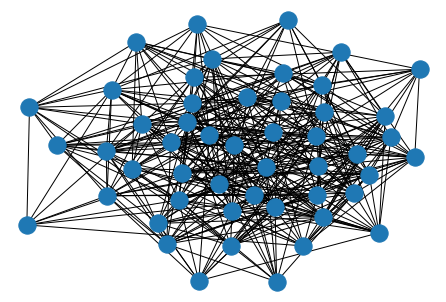

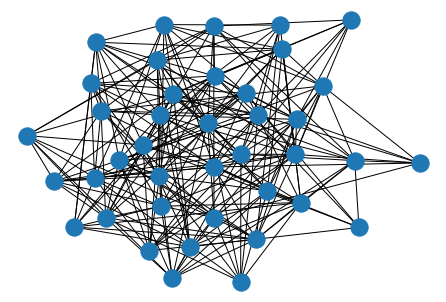

In [1]:
#Erdos-Renyi Graph in Networkx
import numpy as np
from statistics import mean
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 10000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 40 nodes (contact places) of Cities
T  = K/5 #Number of test available
PAS = 0.7 #Probability of Asymptomatic
PS = 1 - PAS #Probability of Not Asymptomatic


#Graph = nx.gnm_random_graph(N, M)

P = .3      #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 0 ... 0 0 1]
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 1]
 [0 1 0 ... 1 0 0]
 [1 0 1 ... 1 0 0]]
[[0 1 1 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [4]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
print(Node)
print(len(Node))


{0: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 1: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 2: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 3: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 4: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 5: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 6: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 7: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 8: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 9: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 10: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 11: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 12: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 13: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 14: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 15: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 16: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 17: [{'Viral_load': 0}, {'S': 0}, {'I': 0}, {'R': 0}], 18: [{'Viral_load':

In [5]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1

  Symptom = random.choices([0,1],weights=(PAS,PS), k=1)[0]

  Agent[k].append({'Symptom' : Symptom})
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'C' : 0})
    Agent[k].append({'State' : Rand_state, 'C' : 0 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
print(Node)
print(Agent)

{0: [{'Viral_load': 0}, {'S': 5}, {'I': 0}, {'R': 0}, {6972: 0}, {7580: 0}, {7838: 0}, {8772: 0}, {9393: 0}], 1: [{'Viral_load': 0}, {'S': 3}, {'I': 0}, {'R': 0}, {3738: 0}, {4916: 0}, {7357: 0}], 2: [{'Viral_load': 0}, {'S': 7}, {'I': 0}, {'R': 0}, {65: 0}, {302: 0}, {446: 0}, {2091: 0}, {2364: 0}, {4150: 0}, {6296: 0}], 3: [{'Viral_load': 0}, {'S': 8}, {'I': 0}, {'R': 0}, {203: 0}, {1240: 0}, {1297: 0}, {4922: 0}, {7084: 0}, {8213: 0}, {8261: 0}, {8728: 0}], 4: [{'Viral_load': 0}, {'S': 10}, {'I': 0}, {'R': 0}, {345: 0}, {393: 0}, {563: 0}, {2717: 0}, {3105: 0}, {3252: 0}, {4499: 0}, {7226: 0}, {8272: 0}, {8834: 0}], 5: [{'Viral_load': 0}, {'S': 8}, {'I': 0}, {'R': 0}, {476: 0}, {1160: 0}, {4778: 0}, {6153: 0}, {6209: 0}, {6534: 0}, {8345: 0}, {9821: 0}], 6: [{'Viral_load': 0}, {'S': 3}, {'I': 1}, {'R': 0}, {824: 0}, {4164: 0}, {6897: 1, 'C': 0}, {7171: 0}], 7: [{'Viral_load': 0}, {'S': 8}, {'I': 0}, {'R': 0}, {315: 0}, {464: 0}, {709: 0}, {1133: 0}, {1694: 0}, {2696: 0}, {6582: 0}, 

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load']*.5)})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  neighbors.append(Agent_next[a_id][2]['Home_node'])
                  neighbors.append(Agent_next[a_id][4]['First_node'])
                  neighbors.append(Agent_next[a_id][6]['Second_node'])

                  if len(neighbors) > 0:  
                      I1=(Node[Agent_next[a_id][5]['First_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][5]['First_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][2]['I'])
                      I2=(Node[Agent_next[a_id][7]['Second_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][7]['Second_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][2]['I'])
                      IH=(Node[Agent_next[a_id][3]['Home_nodeN'][0]][2]['I'] +  Node[Agent_next[a_id][3]['Home_nodeN'][1]][2]['I'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][2]['I'])
                      V1 = (Node[Agent_next[a_id][5]['First_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][5]['First_nodeN'][2]][0]['Viral_load'])
                      V2 = (Node[Agent_next[a_id][7]['Second_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][7]['Second_nodeN'][2]][0]['Viral_load'])
                      VH = (Node[Agent_next[a_id][3]['Home_nodeN'][0]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][1]][0]['Viral_load'] + Node[Agent_next[a_id][3]['Home_nodeN'][2]][0]['Viral_load'])
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      PH = IH/(IH**2 + .01) + VH/(VH**2+.01)
                      if max(P1,P2,PH) == PH:
                        PH = 3*PH
                        P1 = P1/3
                        P2 = P2/3
                      elif max(P1,P2,PH) == P1:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      else:
                        P1 = P1
                        P2 = P2
                        PH = 3*PH
                      P = P1 + P2 + PH                      
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1 = PH/P 
                        PNN2 = P1/P
                        PNN3 = P2/P 
                      #next = random.choices(neighbors,weights=(PNN1,PNN2,PNN3), k=1)[0] 
                      next = random.choices(neighbors,weights=(.95,.025,.025), k=1)[0]
                      if next == Agent_next[a_id][8]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][4]['First_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][4]['First_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][5]['First_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][5]['First_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][5]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][6]['Second_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][6]['Second_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][7]['Second_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][7]['Second_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][7]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][2]['Home_node']:
                          Agent_next[a_id][8]['Current_node'] = Agent_next[a_id][2]['Home_node']
                          Agent_next[a_id][9]['Current_nodeN'][0] = Agent_next[a_id][3]['Home_nodeN'][0]
                          Agent_next[a_id][9]['Current_nodeN'][1] = Agent_next[a_id][3]['Home_nodeN'][1]
                          Agent_next[a_id][9]['Current_nodeN'][2] = Agent_next[a_id][3]['Home_nodeN'][2]
                          count_stay_home+=1
                      I2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][2]['I']
                      I3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][2]['I']
                      I1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][2]['I']
                      V2 = Node[Agent_next[a_id][9]['Current_nodeN'][1]][0]['Viral_load']
                      V3 = Node[Agent_next[a_id][9]['Current_nodeN'][2]][0]['Viral_load']
                      V1 = Node[Agent_next[a_id][9]['Current_nodeN'][0]][0]['Viral_load']
                      P2 = I2/(I2**2 + .01) + V2/(V2**2+.01)
                      P3 = I3/(I3**2 + .01) + V3/(V3**2+.01)
                      P1 = I1/(I1**2 + .01) + V1/(V1**2+.01)
                      if max(P1,P2,P3) == P1:
                        P1 = 3*P1
                        P2 = P2
                        P3 = P3
                      elif max(P1,P2,P3) == P2:
                        P1 = 3*P1
                        P2 = 2*P2
                        P3 = P1
                      else:
                        P1 = 3*P1
                        P2 = P2
                        P3 = 2*P3
                      P = P1+P2+P3
                      if P == 0:
                        PNN1 = 1
                        PNN2 = 0
                        PNN3 = 0
                      else:
                        PNN1=P1/P
                        PNN2=P2/P
                        PNN3=P3/P
                       
                      #nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(PNN1,PNN2,PNN3),k=1)[0]
                      nextn = random.choices(Agent_next[a_id][9]['Current_nodeN'],weights=(.90,.05,.05),k=1)[0]                    
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['C']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          walks.append(nex)

    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        Total = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] + 1
        W1 = (Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load'])/Total
        W2 = (Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1)/Total
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'C' : 0})
              Agent_next[a_id][1]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['C'] == 4:   #Time-steps of 4 to get cured(I -> R)
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][1]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('C') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home) 

    return Node,Node_next,Agent,Agent_next

In [8]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  total_V=0.0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
    total_V+=Node[i][0]['Viral_load']
  return count_S,count_I,count_R,total_V

In [9]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][1]['State'] == 0:
      count_S+=1
    elif Agent[i][1]['State'] == 1:
      count_I+=1
    elif Agent[i][1]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149]
[201, 391, 695, 1119, 1553, 2086, 2718, 3344, 3858, 4251, 4282, 3940, 3328, 2562, 1806, 1234, 773, 478, 288, 180, 114, 67, 50, 29, 23, 16, 12, 5, 1, 0]
[0, 0, 0, 0, 201, 391, 695, 1119, 1754, 2477, 3413, 4463, 5612, 6728, 7695, 8403, 8940, 9290, 9501, 9637, 9713, 9768, 9789, 9817, 9827, 9835, 9839, 9846, 9850, 9851]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149]]
[[], [201, 391, 695, 1119, 1553, 2086, 2718, 3344, 3858, 4251, 4282, 3940, 3328, 2562, 1806, 1234, 773, 478, 288, 180, 114, 67, 50, 29, 23, 16, 12, 5, 1, 0]]
[[], [0, 0, 0, 0, 201, 391, 695, 1119, 

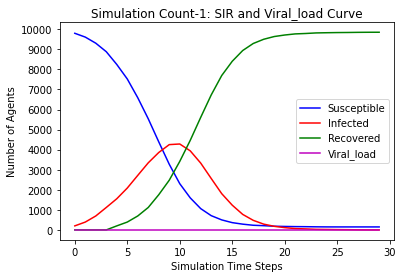

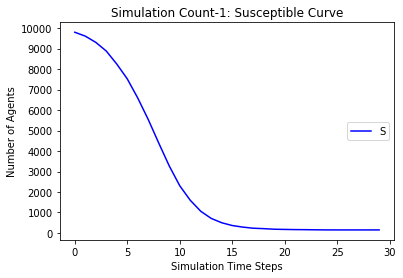

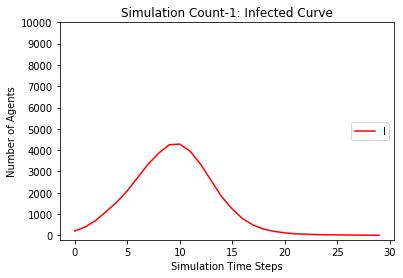

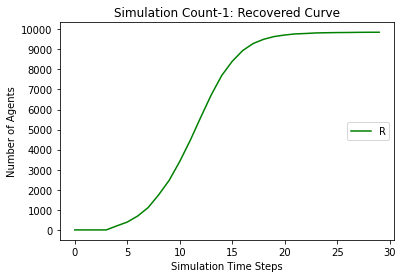

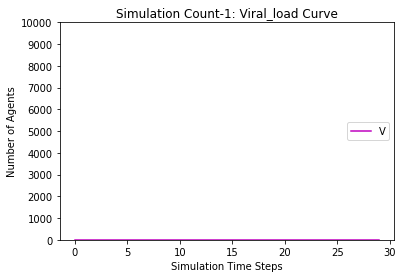

[9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197]
[201, 397, 719, 1179, 1574, 2097, 2681, 3244, 3703, 4002, 4012, 3703, 3194, 2551, 1898, 1366, 920, 620, 408, 251, 175, 116, 72, 54, 35, 20, 13, 6, 1, 0]
[0, 0, 0, 0, 201, 397, 719, 1179, 1775, 2494, 3400, 4423, 5478, 6496, 7412, 8126, 8672, 9047, 9310, 9492, 9592, 9667, 9718, 9743, 9767, 9783, 9790, 9797, 9802, 9803]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197]]
[[], [201, 391, 695, 1119, 1553

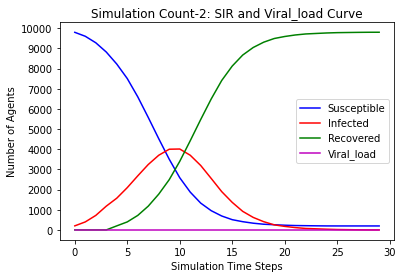

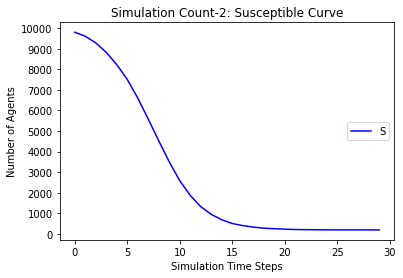

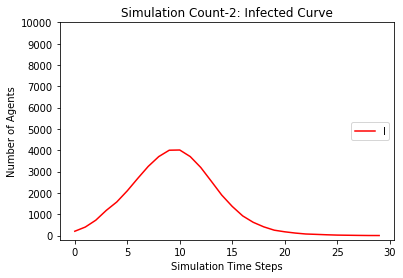

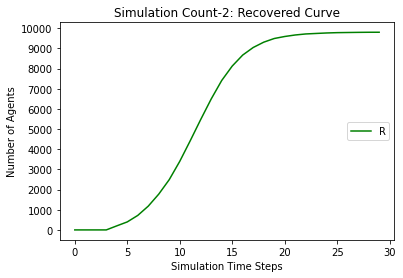

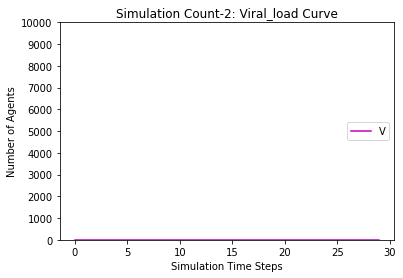

[9799, 9598, 9275, 8820, 8197, 7429, 6449, 5372, 4268, 3173, 2220, 1459, 937, 619, 440, 318, 261, 212, 191, 172, 160, 155, 152, 150, 149, 149, 148, 148, 148, 148, 148]
[201, 402, 725, 1180, 1602, 2169, 2826, 3448, 3929, 4256, 4229, 3913, 3331, 2554, 1780, 1141, 676, 407, 249, 146, 101, 57, 39, 22, 11, 6, 4, 2, 1, 1, 0]
[0, 0, 0, 0, 201, 402, 725, 1180, 1803, 2571, 3551, 4628, 5732, 6827, 7780, 8541, 9063, 9381, 9560, 9682, 9739, 9788, 9809, 9828, 9840, 9845, 9848, 9850, 9851, 9851, 9852]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 927

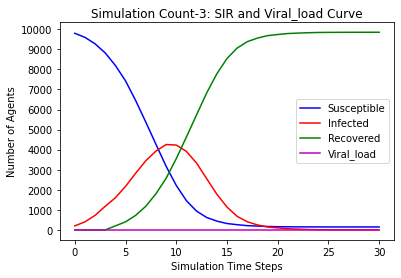

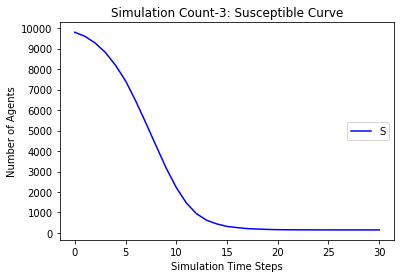

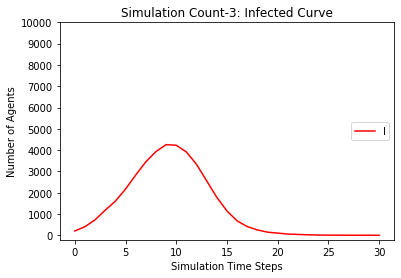

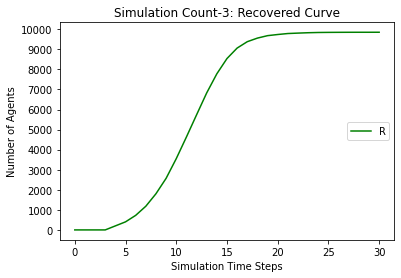

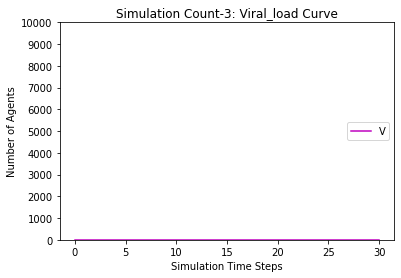

[9799, 9579, 9248, 8755, 8093, 7352, 6451, 5414, 4321, 3296, 2417, 1676, 1182, 792, 552, 390, 282, 206, 162, 147, 132, 124, 120, 118, 117, 116, 116, 115, 115, 115, 115, 115]
[201, 421, 752, 1245, 1706, 2227, 2797, 3341, 3772, 4056, 4034, 3738, 3139, 2504, 1865, 1286, 900, 586, 390, 243, 150, 82, 42, 29, 15, 8, 4, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 201, 421, 752, 1245, 1907, 2648, 3549, 4586, 5679, 6704, 7583, 8324, 8818, 9208, 9448, 9610, 9718, 9794, 9838, 9853, 9868, 9876, 9880, 9882, 9883, 9884, 9884, 9885]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 19

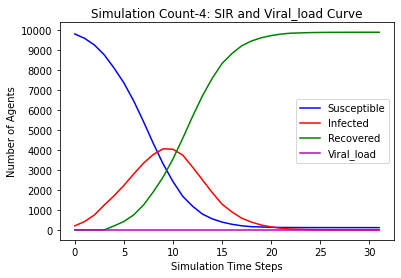

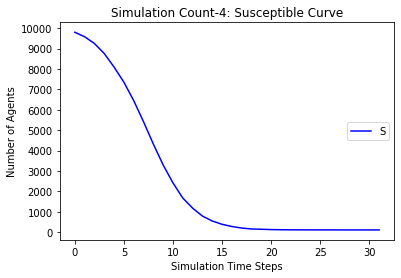

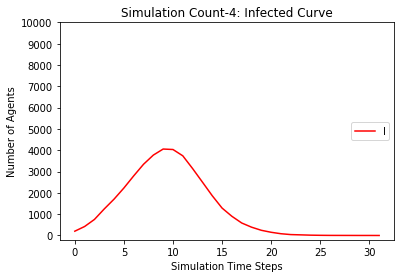

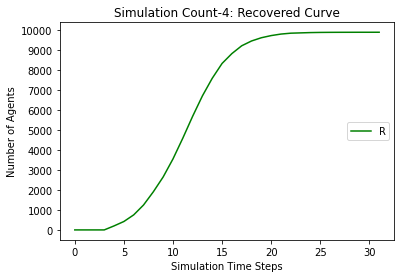

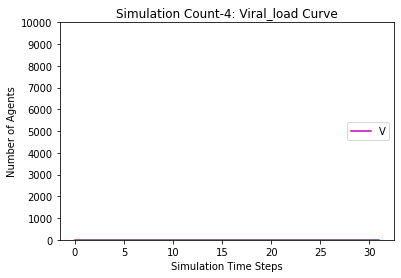

[9799, 9610, 9283, 8818, 8158, 7362, 6360, 5268, 4143, 3057, 2155, 1456, 971, 647, 440, 304, 232, 201, 183, 170, 166, 161, 158, 154, 152, 152, 152, 151, 151, 151, 151, 151]
[201, 390, 717, 1182, 1641, 2248, 2923, 3550, 4015, 4305, 4205, 3812, 3172, 2410, 1715, 1152, 739, 446, 257, 134, 66, 40, 25, 16, 14, 9, 6, 3, 1, 1, 1, 0]
[0, 0, 0, 0, 201, 390, 717, 1182, 1842, 2638, 3640, 4732, 5857, 6943, 7845, 8544, 9029, 9353, 9560, 9696, 9768, 9799, 9817, 9830, 9834, 9839, 9842, 9846, 9848, 9848, 9848, 9849]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197]

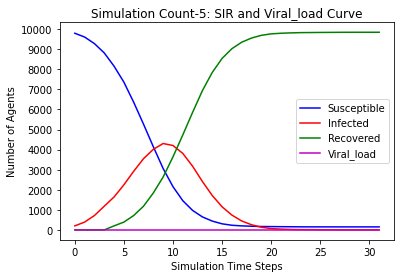

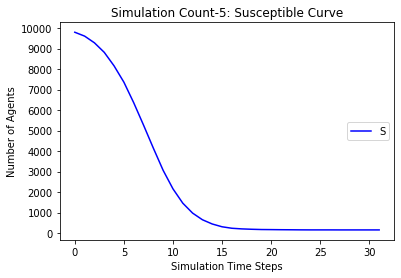

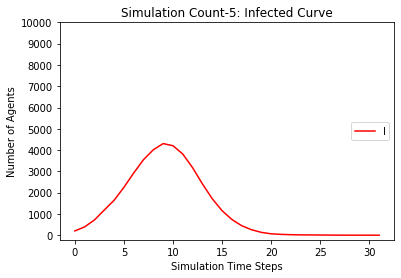

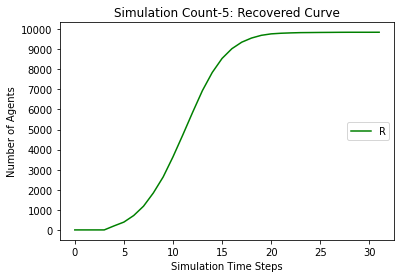

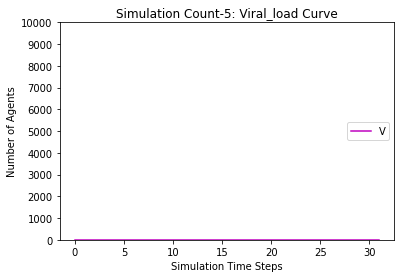

[9799, 9612, 9295, 8836, 8212, 7461, 6573, 5526, 4439, 3403, 2462, 1716, 1139, 761, 515, 396, 308, 256, 227, 210, 201, 194, 190, 185, 183, 182, 181, 180, 180, 180, 180, 180]
[201, 388, 705, 1164, 1587, 2151, 2722, 3310, 3773, 4058, 4111, 3810, 3300, 2642, 1947, 1320, 831, 505, 288, 186, 107, 62, 37, 25, 18, 12, 9, 5, 3, 2, 1, 0]
[0, 0, 0, 0, 201, 388, 705, 1164, 1788, 2539, 3427, 4474, 5561, 6597, 7538, 8284, 8861, 9239, 9485, 9604, 9692, 9744, 9773, 9790, 9799, 9806, 9810, 9815, 9817, 9818, 9819, 9820]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 1

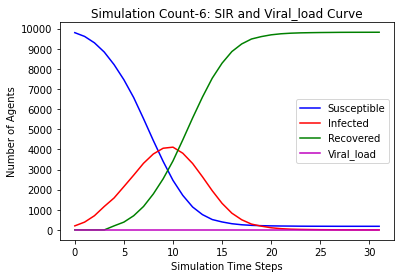

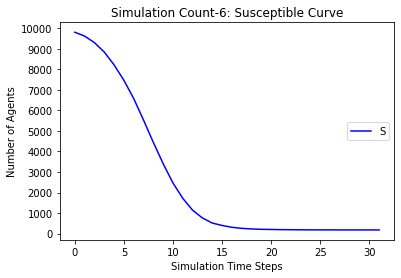

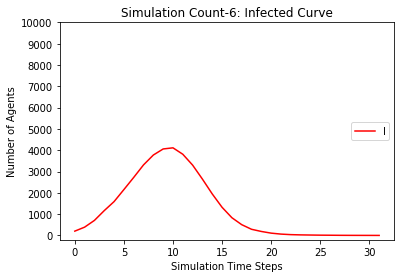

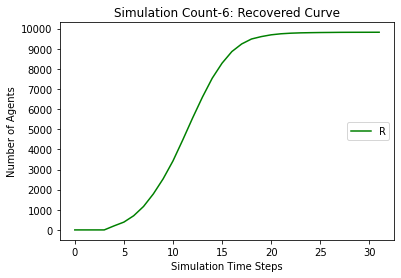

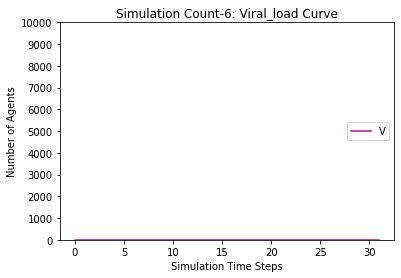

[9799, 9590, 9266, 8830, 8227, 7517, 6635, 5683, 4621, 3548, 2602, 1827, 1233, 863, 600, 453, 346, 279, 227, 197, 186, 178, 172, 168, 167, 167, 167, 167, 167]
[201, 410, 734, 1170, 1572, 2073, 2631, 3147, 3606, 3969, 4033, 3856, 3388, 2685, 2002, 1374, 887, 584, 373, 256, 160, 101, 55, 29, 19, 11, 5, 1, 0]
[0, 0, 0, 0, 201, 410, 734, 1170, 1773, 2483, 3365, 4317, 5379, 6452, 7398, 8173, 8767, 9137, 9400, 9547, 9654, 9721, 9773, 9803, 9814, 9822, 9828, 9832, 9833]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 7429, 6449, 5372, 42

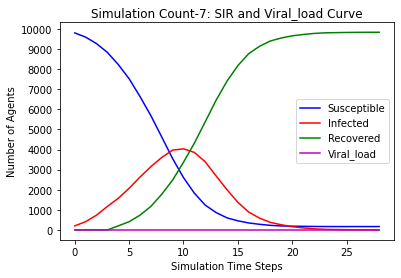

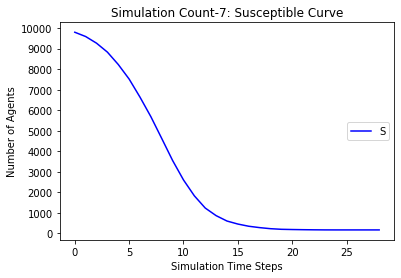

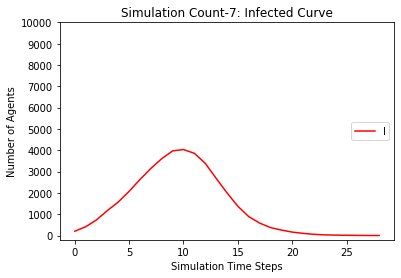

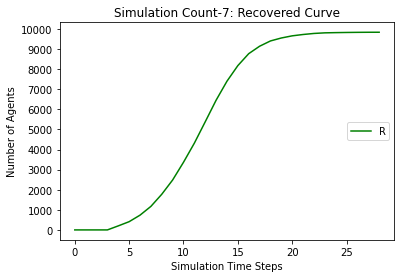

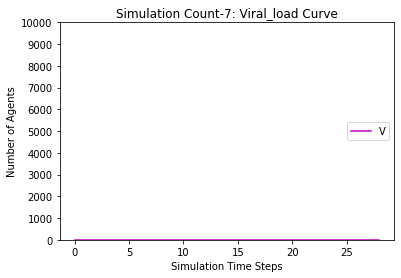

[9799, 9618, 9315, 8880, 8265, 7561, 6688, 5683, 4602, 3529, 2594, 1819, 1239, 840, 589, 434, 330, 251, 208, 184, 171, 166, 157, 156, 153, 150, 149, 148, 148, 146, 145, 145, 145, 145, 145]
[201, 382, 685, 1120, 1534, 2057, 2627, 3197, 3663, 4032, 4094, 3864, 3363, 2689, 2005, 1385, 909, 589, 381, 250, 159, 85, 51, 28, 18, 16, 8, 8, 5, 4, 4, 3, 3, 1, 0]
[0, 0, 0, 0, 201, 382, 685, 1120, 1735, 2439, 3312, 4317, 5398, 6471, 7406, 8181, 8761, 9160, 9411, 9566, 9670, 9749, 9792, 9816, 9829, 9834, 9843, 9844, 9847, 9850, 9851, 9852, 9852, 9854, 9855]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333,

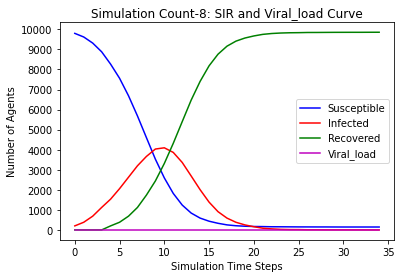

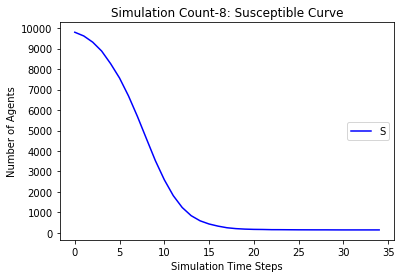

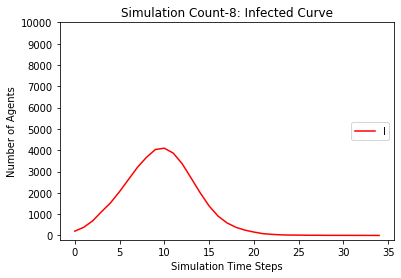

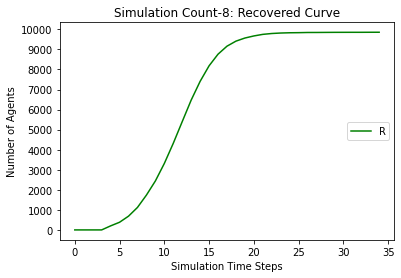

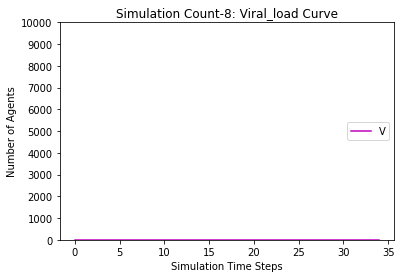

[9799, 9607, 9285, 8825, 8212, 7460, 6574, 5559, 4454, 3354, 2450, 1635, 1093, 713, 483, 364, 303, 265, 235, 217, 197, 196, 195, 195, 194, 194, 194, 194, 194]
[201, 393, 715, 1175, 1587, 2147, 2711, 3266, 3758, 4106, 4124, 3924, 3361, 2641, 1967, 1271, 790, 448, 248, 147, 106, 69, 40, 22, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 201, 393, 715, 1175, 1788, 2540, 3426, 4441, 5546, 6646, 7550, 8365, 8907, 9287, 9517, 9636, 9697, 9735, 9765, 9783, 9803, 9804, 9805, 9805, 9806]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 7429, 6449, 5372, 4268,

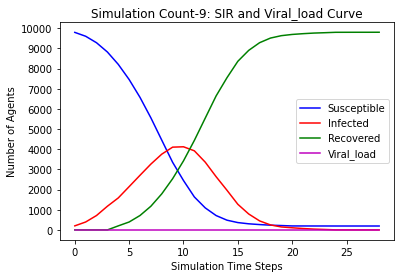

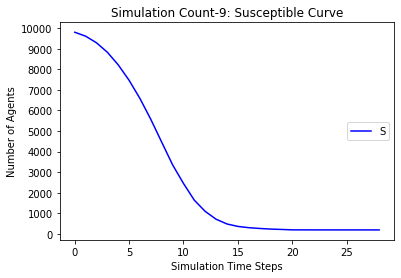

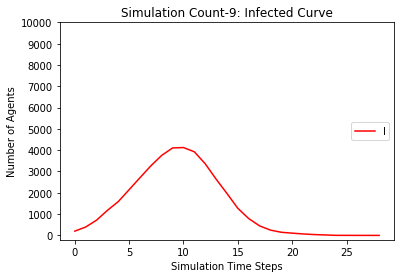

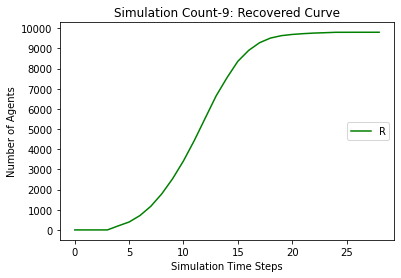

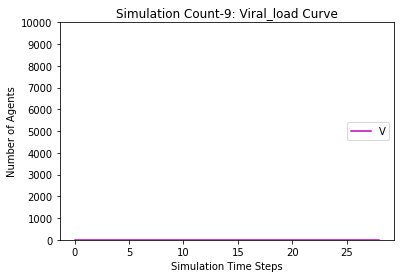

[9799, 9607, 9256, 8761, 8084, 7317, 6429, 5449, 4306, 3237, 2324, 1608, 1099, 744, 527, 407, 316, 256, 223, 203, 195, 186, 182, 177, 175, 174, 173, 172, 172, 172, 172, 172]
[201, 393, 744, 1239, 1715, 2290, 2827, 3312, 3778, 4080, 4105, 3841, 3207, 2493, 1797, 1201, 783, 488, 304, 204, 121, 70, 41, 26, 20, 12, 9, 5, 3, 2, 1, 0]
[0, 0, 0, 0, 201, 393, 744, 1239, 1916, 2683, 3571, 4551, 5694, 6763, 7676, 8392, 8901, 9256, 9473, 9593, 9684, 9744, 9777, 9797, 9805, 9814, 9818, 9823, 9825, 9826, 9827, 9828]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 1

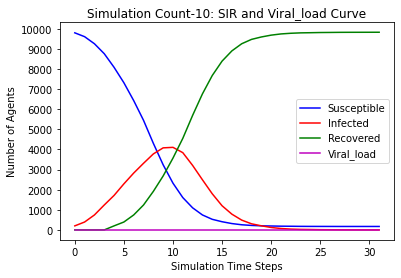

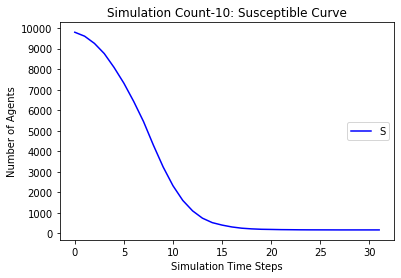

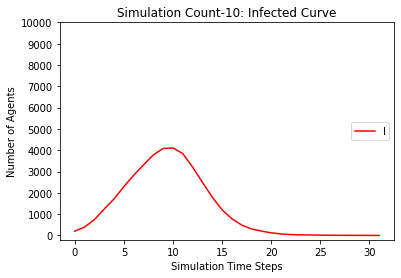

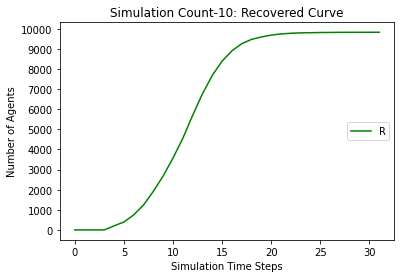

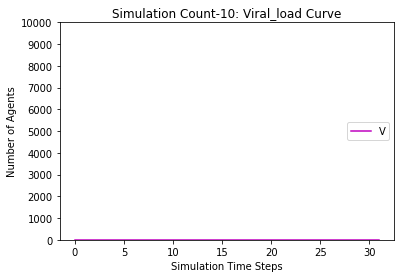

[9799, 9619, 9321, 8905, 8277, 7556, 6724, 5705, 4617, 3543, 2542, 1765, 1211, 811, 548, 425, 337, 290, 263, 243, 232, 225, 215, 212, 211, 210, 210, 210, 210, 210]
[201, 381, 679, 1095, 1522, 2063, 2597, 3200, 3660, 4013, 4182, 3940, 3406, 2732, 1994, 1340, 874, 521, 285, 182, 105, 65, 48, 31, 21, 15, 5, 2, 1, 0]
[0, 0, 0, 0, 201, 381, 679, 1095, 1723, 2444, 3276, 4295, 5383, 6457, 7458, 8235, 8789, 9189, 9452, 9575, 9663, 9710, 9737, 9757, 9768, 9775, 9785, 9788, 9789, 9790]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 74

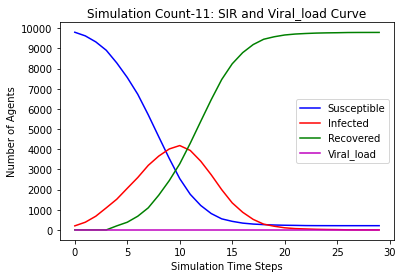

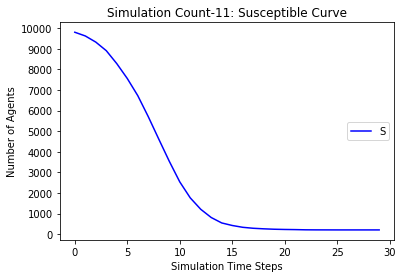

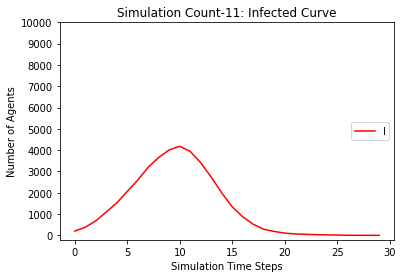

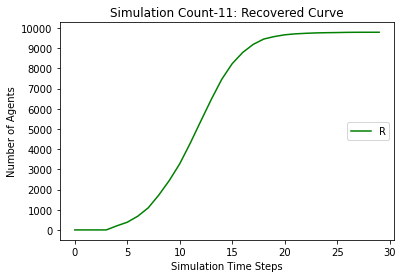

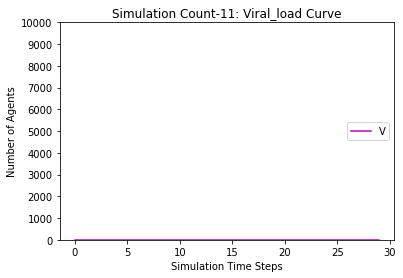

[9799, 9598, 9287, 8820, 8218, 7507, 6648, 5617, 4530, 3442, 2490, 1663, 1102, 726, 500, 354, 265, 214, 187, 173, 165, 160, 157, 149, 145, 143, 142, 141, 141, 141, 141, 141]
[201, 402, 713, 1180, 1581, 2091, 2639, 3203, 3688, 4065, 4158, 3954, 3428, 2716, 1990, 1309, 837, 512, 313, 181, 100, 54, 30, 24, 20, 17, 15, 8, 4, 2, 1, 0]
[0, 0, 0, 0, 201, 402, 713, 1180, 1782, 2493, 3352, 4383, 5470, 6558, 7510, 8337, 8898, 9274, 9500, 9646, 9735, 9786, 9813, 9827, 9835, 9840, 9843, 9851, 9855, 9857, 9858, 9859]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 

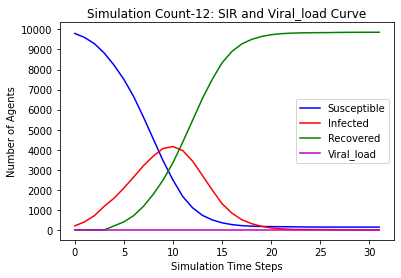

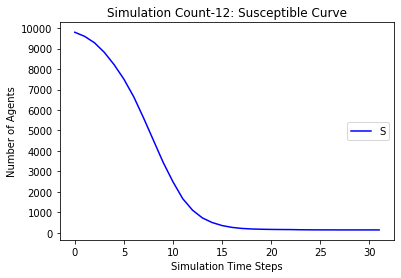

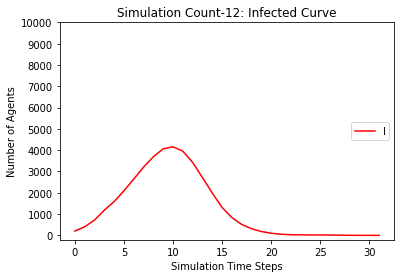

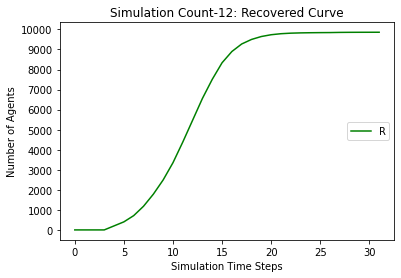

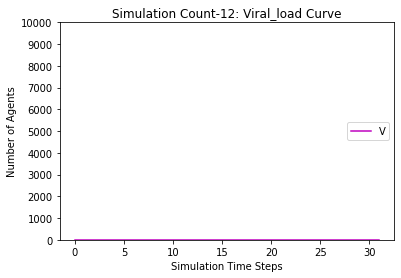

[9799, 9611, 9315, 8871, 8287, 7632, 6807, 5811, 4728, 3670, 2692, 1932, 1322, 875, 597, 444, 353, 293, 264, 238, 222, 217, 213, 213, 210, 210, 209, 208, 207, 206, 203, 203, 203, 203, 203]
[201, 389, 685, 1129, 1512, 1979, 2508, 3060, 3559, 3962, 4115, 3879, 3406, 2795, 2095, 1488, 969, 582, 333, 206, 131, 76, 51, 25, 12, 7, 4, 5, 3, 4, 6, 5, 4, 3, 0]
[0, 0, 0, 0, 201, 389, 685, 1129, 1713, 2368, 3193, 4189, 5272, 6330, 7308, 8068, 8678, 9125, 9403, 9556, 9647, 9707, 9736, 9762, 9778, 9783, 9787, 9787, 9790, 9790, 9791, 9792, 9793, 9794, 9797]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 

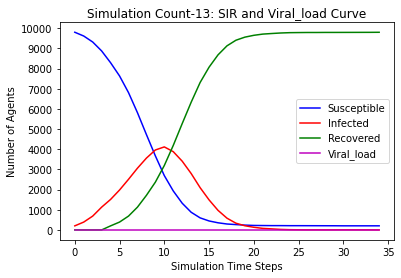

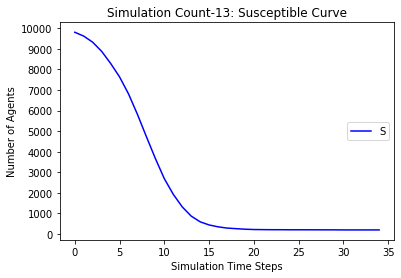

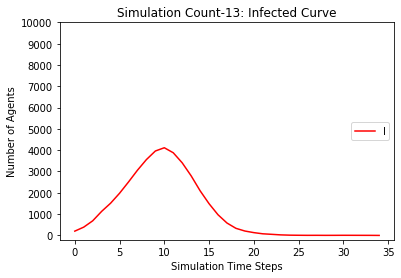

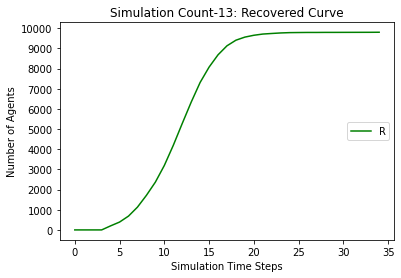

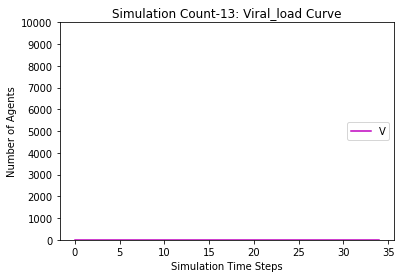

[9799, 9611, 9308, 8867, 8274, 7592, 6708, 5639, 4556, 3501, 2479, 1678, 1142, 796, 576, 413, 317, 267, 233, 212, 202, 194, 190, 183, 176, 170, 169, 168, 167, 167, 167, 167, 167]
[201, 389, 692, 1133, 1525, 2019, 2600, 3228, 3718, 4091, 4229, 3961, 3414, 2705, 1903, 1265, 825, 529, 343, 201, 115, 73, 43, 29, 26, 24, 21, 15, 9, 3, 2, 1, 0]
[0, 0, 0, 0, 201, 389, 692, 1133, 1726, 2408, 3292, 4361, 5444, 6499, 7521, 8322, 8858, 9204, 9424, 9587, 9683, 9733, 9767, 9788, 9798, 9806, 9810, 9817, 9824, 9830, 9831, 9832, 9833]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 

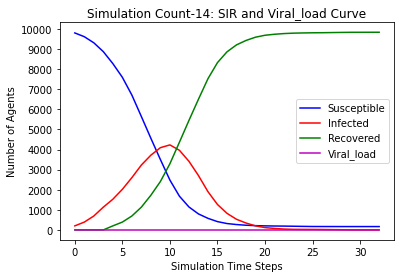

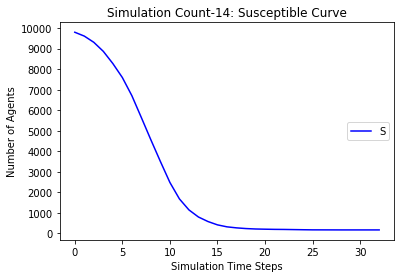

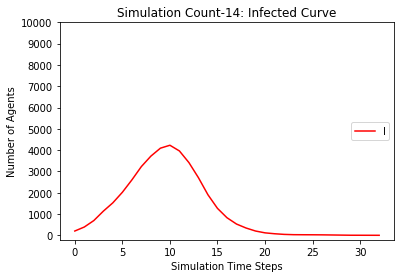

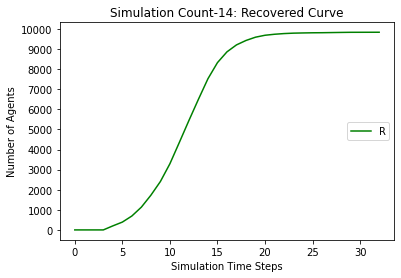

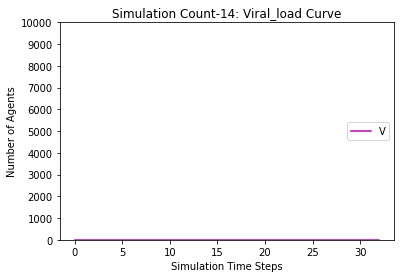

[9799, 9604, 9291, 8841, 8271, 7554, 6637, 5596, 4487, 3324, 2342, 1599, 1060, 689, 502, 386, 301, 260, 236, 227, 213, 208, 208, 206, 206, 205, 205, 205, 205, 205]
[201, 396, 709, 1159, 1528, 2050, 2654, 3245, 3784, 4230, 4295, 3997, 3427, 2635, 1840, 1213, 759, 429, 266, 159, 88, 52, 28, 21, 7, 3, 3, 1, 1, 0]
[0, 0, 0, 0, 201, 396, 709, 1159, 1729, 2446, 3363, 4404, 5513, 6676, 7658, 8401, 8940, 9311, 9498, 9614, 9699, 9740, 9764, 9773, 9787, 9792, 9792, 9794, 9794, 9795]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 7429,

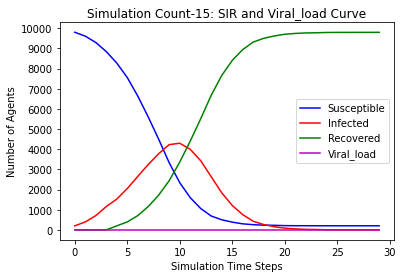

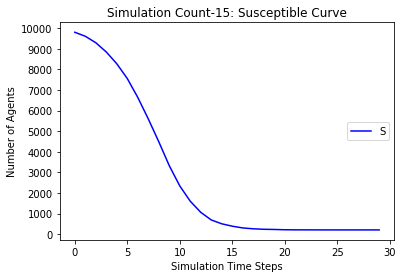

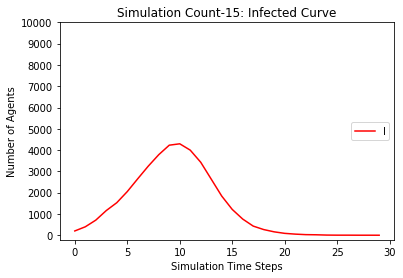

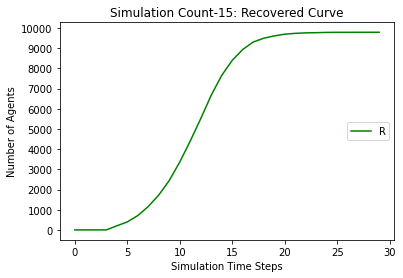

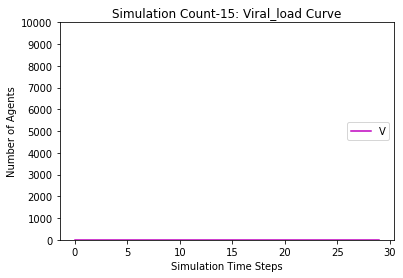

[9799, 9618, 9315, 8857, 8245, 7561, 6641, 5606, 4479, 3405, 2476, 1708, 1141, 747, 539, 390, 311, 263, 222, 198, 182, 178, 175, 173, 171, 171, 171, 171, 171]
[201, 382, 685, 1143, 1554, 2057, 2674, 3251, 3766, 4156, 4165, 3898, 3338, 2658, 1937, 1318, 830, 484, 317, 192, 129, 85, 47, 25, 11, 7, 4, 2, 0]
[0, 0, 0, 0, 201, 382, 685, 1143, 1755, 2439, 3359, 4394, 5521, 6595, 7524, 8292, 8859, 9253, 9461, 9610, 9689, 9737, 9778, 9802, 9818, 9822, 9825, 9827, 9829]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 7429, 6449, 5372, 4268

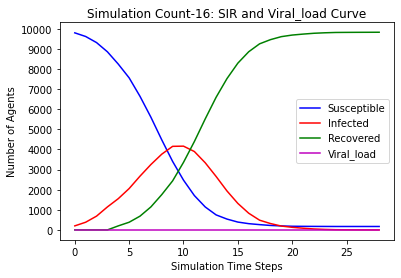

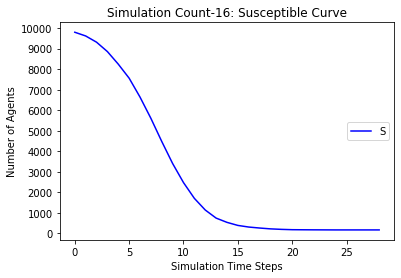

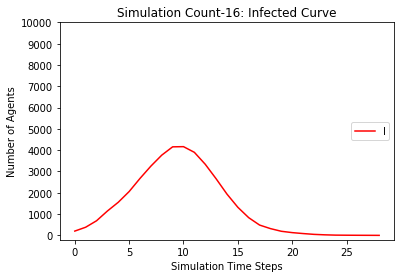

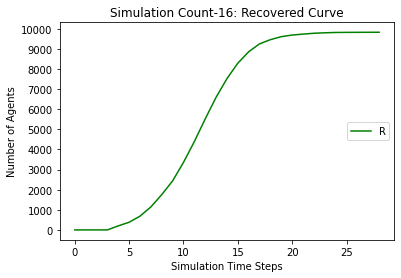

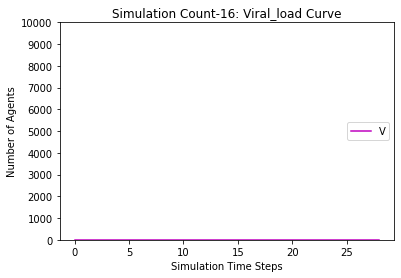

[9799, 9591, 9237, 8800, 8185, 7402, 6481, 5449, 4366, 3297, 2313, 1557, 1032, 706, 478, 341, 263, 223, 192, 179, 166, 160, 155, 150, 149, 148, 147, 146, 145, 144, 143, 143, 143, 143, 143]
[201, 409, 763, 1200, 1614, 2189, 2756, 3351, 3819, 4105, 4168, 3892, 3334, 2591, 1835, 1216, 769, 483, 286, 162, 97, 63, 37, 29, 17, 12, 8, 4, 4, 4, 4, 3, 2, 1, 0]
[0, 0, 0, 0, 201, 409, 763, 1200, 1815, 2598, 3519, 4551, 5634, 6703, 7687, 8443, 8968, 9294, 9522, 9659, 9737, 9777, 9808, 9821, 9834, 9840, 9845, 9850, 9851, 9852, 9853, 9854, 9855, 9856, 9857]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 

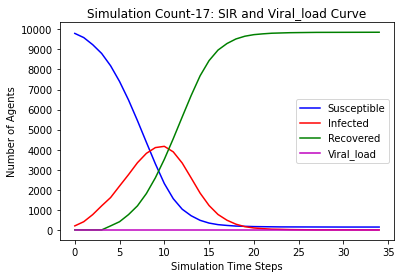

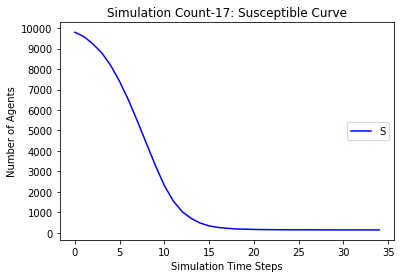

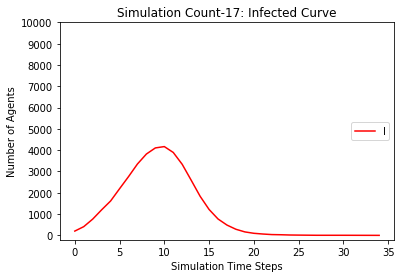

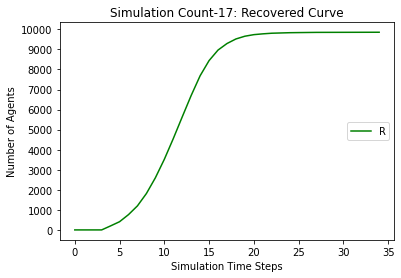

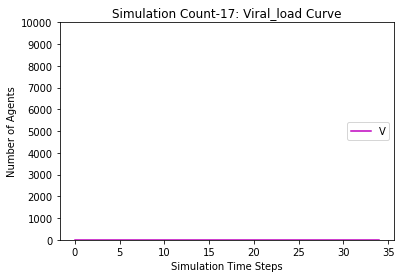

[9799, 9591, 9241, 8796, 8175, 7414, 6516, 5452, 4318, 3239, 2323, 1552, 1012, 651, 461, 337, 265, 218, 190, 176, 165, 162, 159, 158, 157, 157, 156, 156, 156, 156, 156]
[201, 409, 759, 1204, 1624, 2177, 2725, 3344, 3857, 4175, 4193, 3900, 3306, 2588, 1862, 1215, 747, 433, 271, 161, 100, 56, 31, 18, 8, 5, 3, 2, 1, 1, 0]
[0, 0, 0, 0, 201, 409, 759, 1204, 1825, 2586, 3484, 4548, 5682, 6761, 7677, 8448, 8988, 9349, 9539, 9663, 9735, 9782, 9810, 9824, 9835, 9838, 9841, 9842, 9843, 9843, 9844]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 927

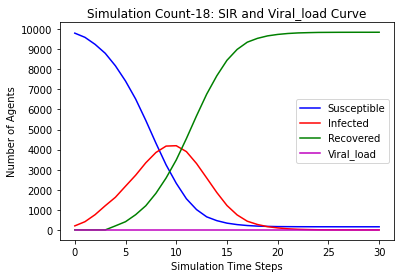

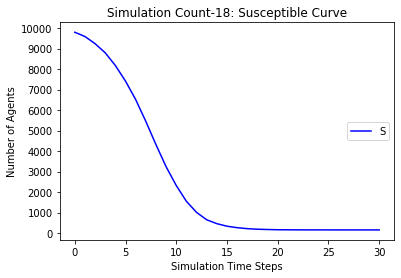

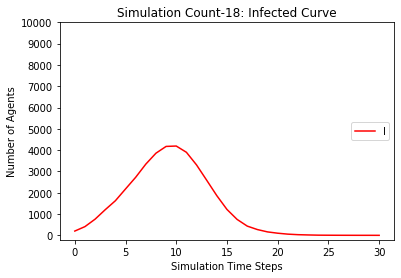

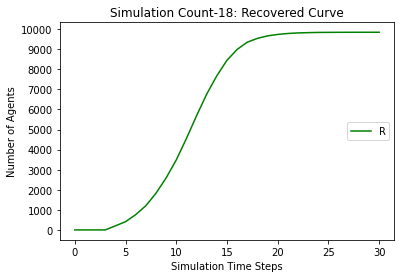

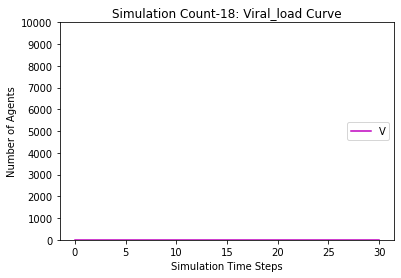

[9799, 9607, 9267, 8786, 8188, 7489, 6584, 5559, 4431, 3350, 2410, 1647, 1104, 751, 537, 408, 313, 262, 233, 216, 206, 202, 199, 196, 194, 192, 191, 191, 191, 191, 191]
[201, 393, 733, 1214, 1611, 2118, 2683, 3227, 3757, 4139, 4174, 3912, 3327, 2599, 1873, 1239, 791, 489, 304, 192, 107, 60, 34, 20, 12, 10, 8, 5, 3, 1, 0]
[0, 0, 0, 0, 201, 393, 733, 1214, 1812, 2511, 3416, 4441, 5569, 6650, 7590, 8353, 8896, 9249, 9463, 9592, 9687, 9738, 9767, 9784, 9794, 9798, 9801, 9804, 9806, 9808, 9809]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9

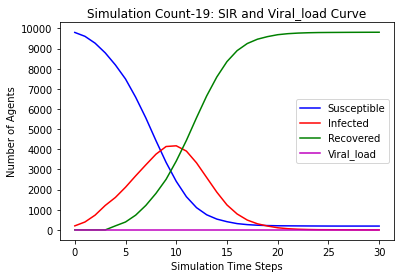

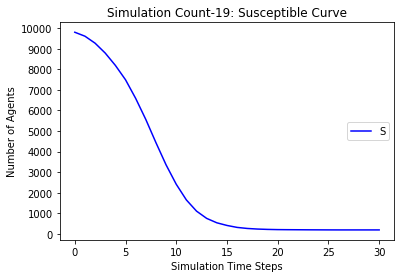

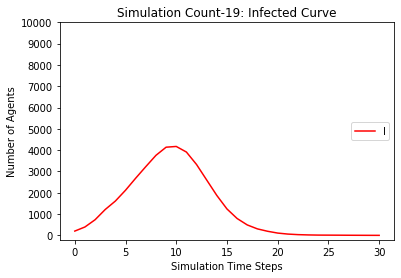

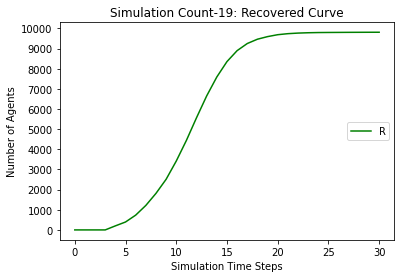

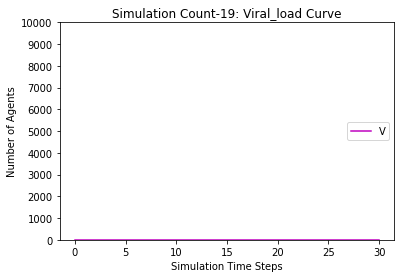

[9799, 9595, 9272, 8790, 8153, 7406, 6477, 5388, 4170, 3106, 2236, 1565, 1059, 725, 489, 353, 279, 235, 201, 182, 174, 171, 167, 166, 165, 165, 165, 165, 165]
[201, 405, 728, 1210, 1646, 2189, 2795, 3402, 3983, 4300, 4241, 3823, 3111, 2381, 1747, 1212, 780, 490, 288, 171, 105, 64, 34, 16, 9, 6, 2, 1, 0]
[0, 0, 0, 0, 201, 405, 728, 1210, 1847, 2594, 3523, 4612, 5830, 6894, 7764, 8435, 8941, 9275, 9511, 9647, 9721, 9765, 9799, 9818, 9826, 9829, 9833, 9834, 9835]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 7429, 6449, 5372, 4268,

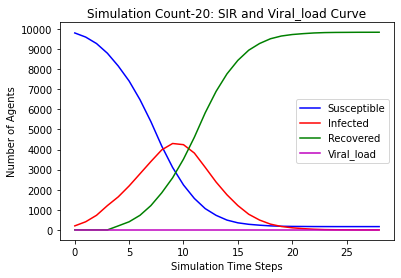

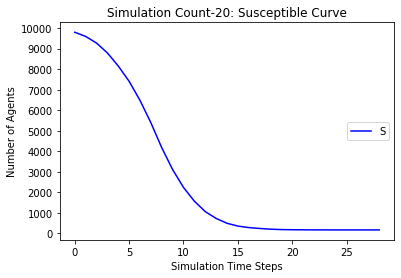

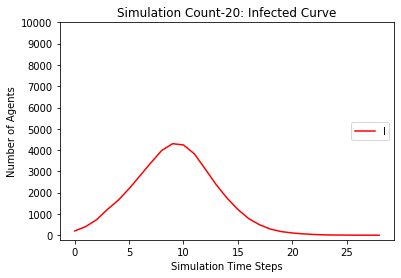

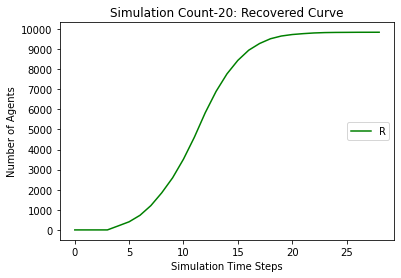

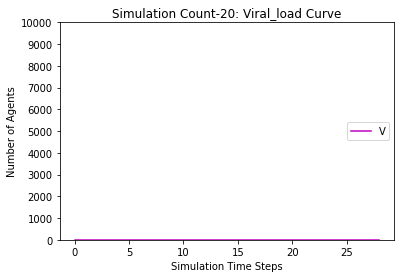

[9799, 9611, 9328, 8881, 8286, 7564, 6675, 5647, 4474, 3364, 2435, 1691, 1139, 756, 503, 336, 251, 190, 159, 141, 135, 131, 129, 127, 127, 127, 126, 125, 124, 124, 124, 124, 124]
[201, 389, 672, 1119, 1513, 2047, 2653, 3234, 3812, 4200, 4240, 3956, 3335, 2608, 1932, 1355, 888, 566, 344, 195, 116, 59, 30, 14, 8, 4, 3, 2, 3, 3, 2, 1, 0]
[0, 0, 0, 0, 201, 389, 672, 1119, 1714, 2436, 3325, 4353, 5526, 6636, 7565, 8309, 8861, 9244, 9497, 9664, 9749, 9810, 9841, 9859, 9865, 9869, 9871, 9873, 9873, 9873, 9874, 9875, 9876]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197,

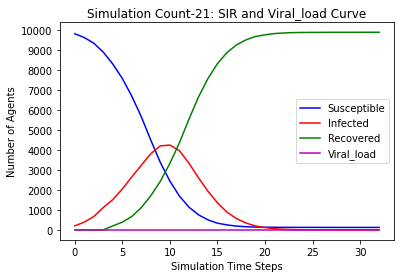

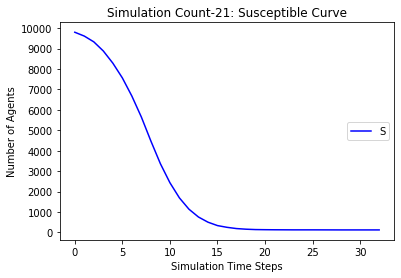

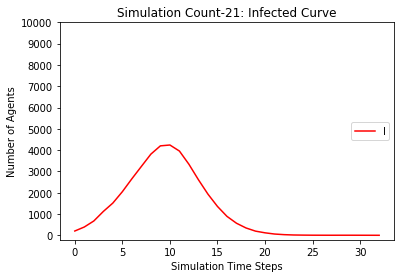

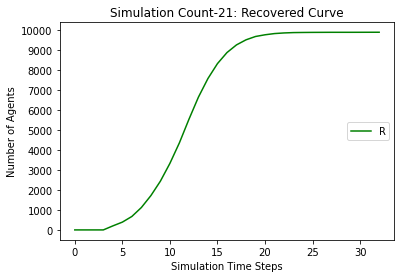

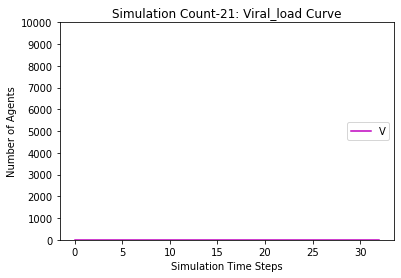

[9799, 9613, 9301, 8846, 8200, 7469, 6568, 5508, 4381, 3323, 2388, 1640, 1100, 741, 540, 405, 331, 269, 234, 214, 205, 194, 188, 183, 183, 182, 182, 182, 182, 182]
[201, 387, 699, 1154, 1599, 2144, 2733, 3338, 3819, 4146, 4180, 3868, 3281, 2582, 1848, 1235, 769, 472, 306, 191, 126, 75, 46, 31, 22, 12, 6, 1, 1, 0]
[0, 0, 0, 0, 201, 387, 699, 1154, 1800, 2531, 3432, 4492, 5619, 6677, 7612, 8360, 8900, 9259, 9460, 9595, 9669, 9731, 9766, 9786, 9795, 9806, 9812, 9817, 9817, 9818]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 74

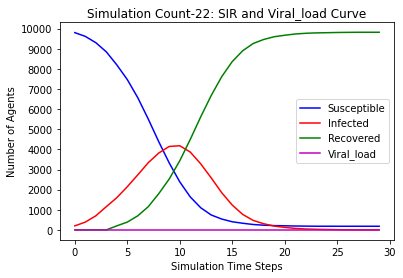

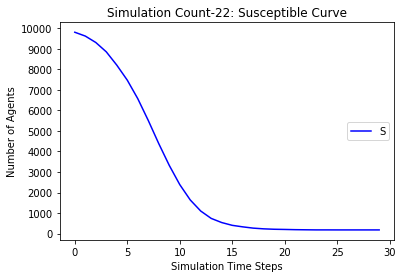

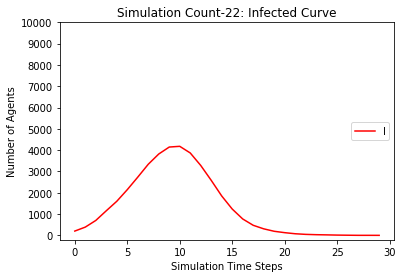

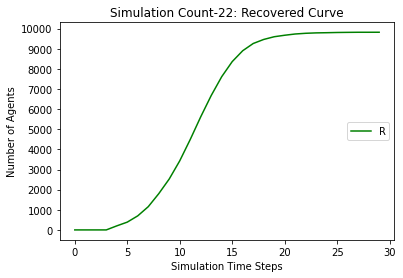

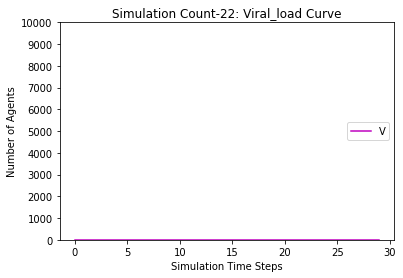

[9799, 9616, 9307, 8873, 8310, 7653, 6855, 5906, 4886, 3847, 2860, 2055, 1389, 924, 618, 443, 325, 261, 214, 185, 172, 165, 160, 157, 155, 154, 153, 153, 153, 153, 153]
[201, 384, 693, 1127, 1489, 1963, 2452, 2967, 3424, 3806, 3995, 3851, 3497, 2923, 2242, 1612, 1064, 663, 404, 258, 153, 96, 54, 28, 17, 11, 7, 4, 2, 1, 0]
[0, 0, 0, 0, 201, 384, 693, 1127, 1690, 2347, 3145, 4094, 5114, 6153, 7140, 7945, 8611, 9076, 9382, 9557, 9675, 9739, 9786, 9815, 9828, 9835, 9840, 9843, 9845, 9846, 9847]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 

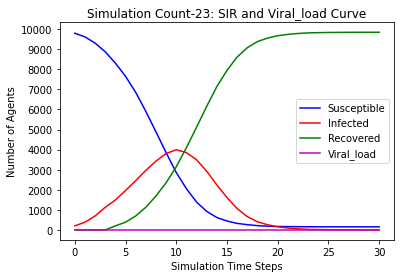

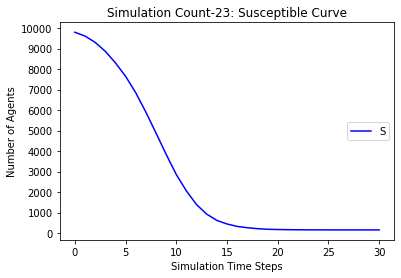

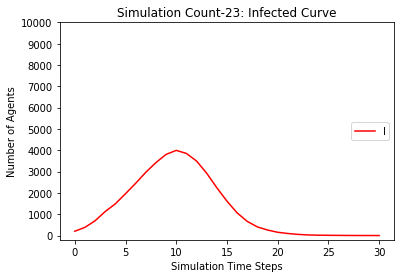

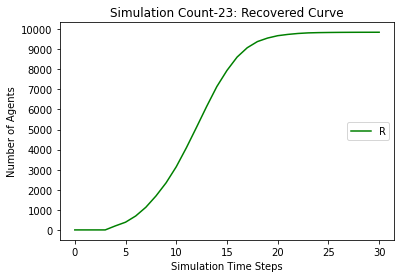

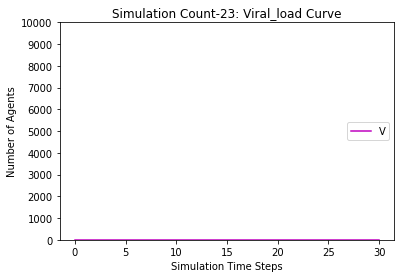

[9799, 9617, 9326, 8890, 8313, 7591, 6745, 5725, 4664, 3572, 2620, 1852, 1266, 861, 572, 397, 285, 239, 200, 179, 168, 160, 155, 154, 151, 150, 148, 148, 148, 148, 148]
[201, 383, 674, 1110, 1486, 2026, 2581, 3165, 3649, 4019, 4125, 3873, 3398, 2711, 2048, 1455, 981, 622, 372, 218, 117, 79, 45, 25, 17, 10, 7, 6, 3, 2, 0]
[0, 0, 0, 0, 201, 383, 674, 1110, 1687, 2409, 3255, 4275, 5336, 6428, 7380, 8148, 8734, 9139, 9428, 9603, 9715, 9761, 9800, 9821, 9832, 9840, 9845, 9846, 9849, 9850, 9852]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9

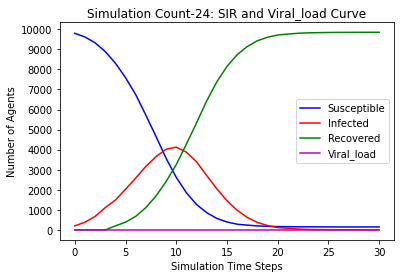

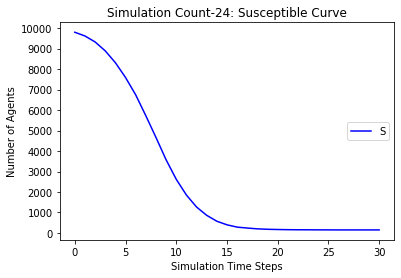

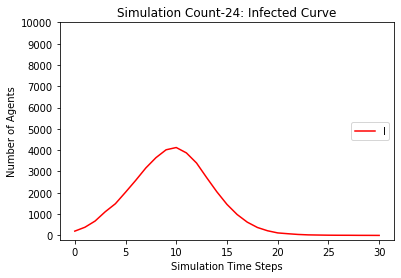

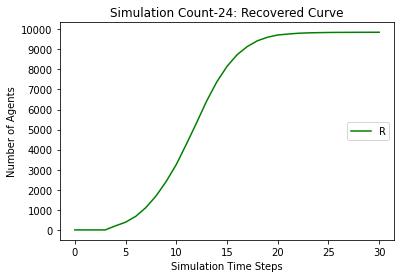

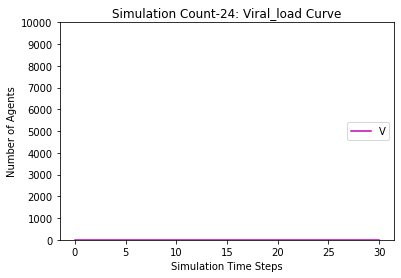

[9799, 9595, 9302, 8858, 8243, 7558, 6723, 5699, 4575, 3503, 2552, 1752, 1158, 785, 529, 375, 290, 232, 203, 180, 166, 161, 156, 151, 148, 148, 147, 147, 147, 147, 147]
[201, 405, 698, 1142, 1556, 2037, 2579, 3159, 3668, 4055, 4171, 3947, 3417, 2718, 2023, 1377, 868, 553, 326, 195, 124, 71, 47, 29, 18, 13, 9, 4, 1, 1, 0]
[0, 0, 0, 0, 201, 405, 698, 1142, 1757, 2442, 3277, 4301, 5425, 6497, 7448, 8248, 8842, 9215, 9471, 9625, 9710, 9768, 9797, 9820, 9834, 9839, 9844, 9849, 9852, 9852, 9853]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9

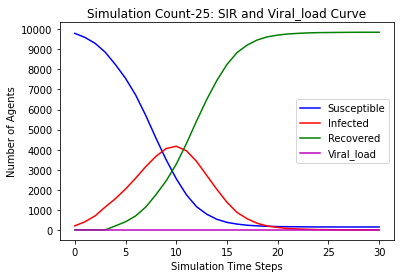

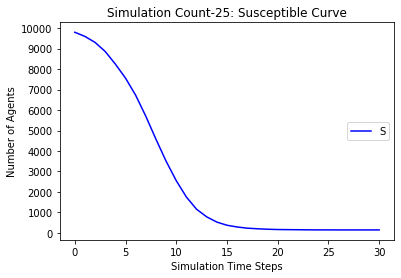

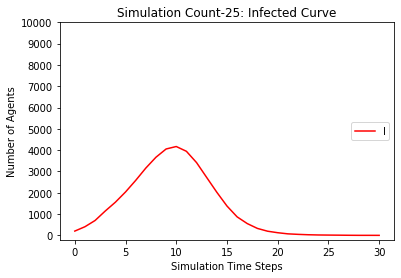

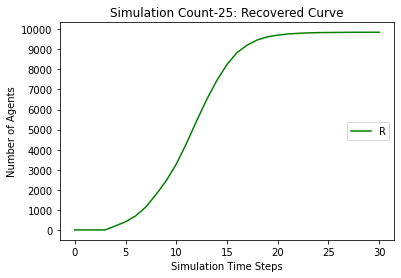

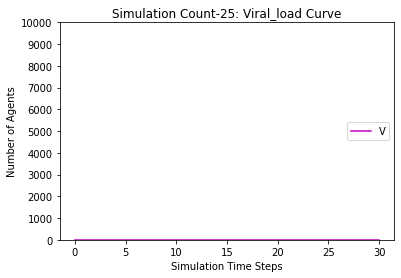

[9799, 9619, 9331, 8908, 8329, 7647, 6842, 5877, 4834, 3815, 2823, 2004, 1362, 944, 655, 458, 339, 276, 233, 211, 202, 198, 193, 190, 187, 186, 184, 183, 183, 183, 183, 183]
[201, 381, 669, 1092, 1470, 1972, 2489, 3031, 3495, 3832, 4019, 3873, 3472, 2871, 2168, 1546, 1023, 668, 422, 247, 137, 78, 40, 21, 15, 12, 9, 7, 4, 3, 1, 0]
[0, 0, 0, 0, 201, 381, 669, 1092, 1671, 2353, 3158, 4123, 5166, 6185, 7177, 7996, 8638, 9056, 9345, 9542, 9661, 9724, 9767, 9789, 9798, 9802, 9807, 9810, 9813, 9814, 9816, 9817]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 

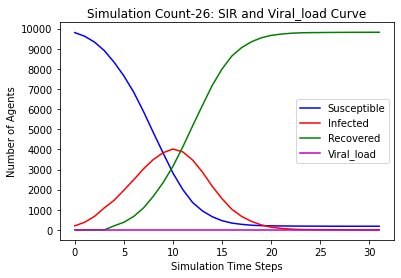

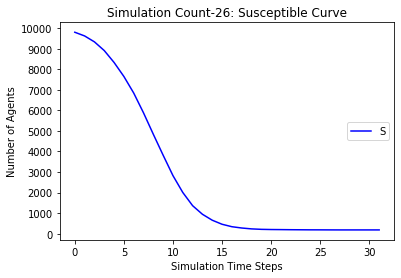

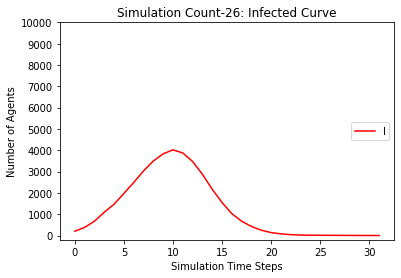

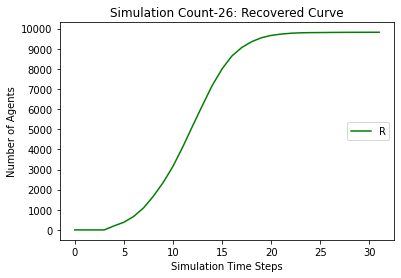

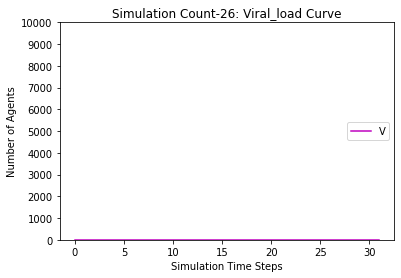

[9799, 9610, 9321, 8902, 8291, 7588, 6751, 5773, 4659, 3550, 2527, 1758, 1177, 807, 589, 436, 351, 289, 261, 234, 214, 199, 190, 184, 178, 175, 173, 173, 172, 172, 172, 172, 172]
[201, 390, 679, 1098, 1508, 2022, 2570, 3129, 3632, 4038, 4224, 4015, 3482, 2743, 1938, 1322, 826, 518, 328, 202, 137, 90, 71, 50, 36, 24, 17, 11, 6, 3, 1, 1, 0]
[0, 0, 0, 0, 201, 390, 679, 1098, 1709, 2412, 3249, 4227, 5341, 6450, 7473, 8242, 8823, 9193, 9411, 9564, 9649, 9711, 9739, 9766, 9786, 9801, 9810, 9816, 9822, 9825, 9827, 9827, 9828]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 

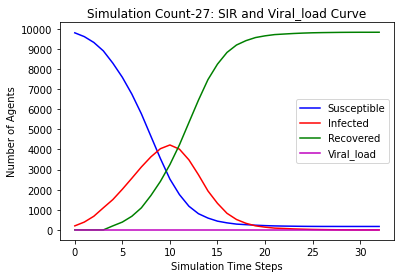

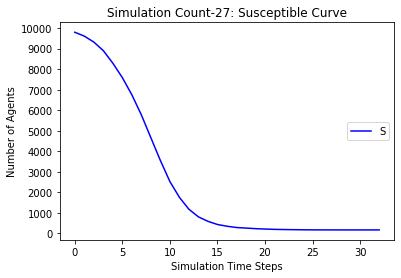

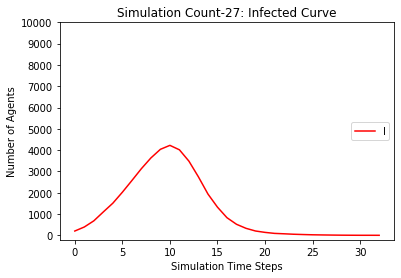

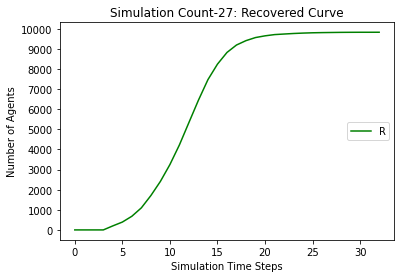

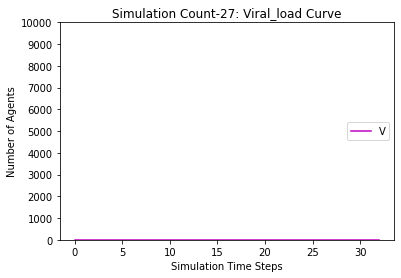

[9799, 9576, 9247, 8824, 8241, 7534, 6653, 5637, 4509, 3408, 2455, 1656, 1086, 728, 512, 368, 279, 220, 199, 187, 175, 170, 167, 167, 166, 166, 166, 166, 166]
[201, 424, 753, 1176, 1558, 2042, 2594, 3187, 3732, 4126, 4198, 3981, 3423, 2680, 1943, 1288, 807, 508, 313, 181, 104, 50, 32, 20, 9, 4, 1, 1, 0]
[0, 0, 0, 0, 201, 424, 753, 1176, 1759, 2466, 3347, 4363, 5491, 6592, 7545, 8344, 8914, 9272, 9488, 9632, 9721, 9780, 9801, 9813, 9825, 9830, 9833, 9833, 9834]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197], [9799, 9598, 9275, 8820, 8197, 7429, 6449, 5372, 4268,

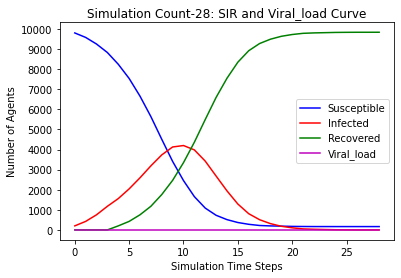

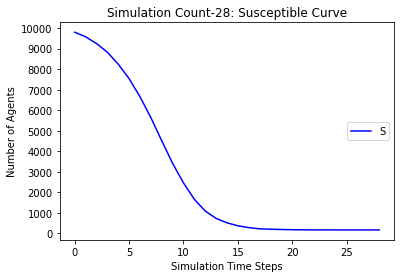

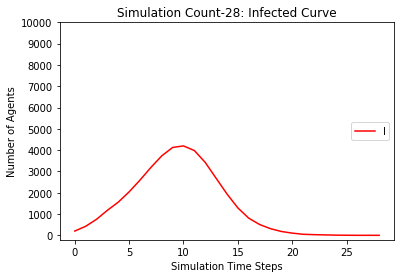

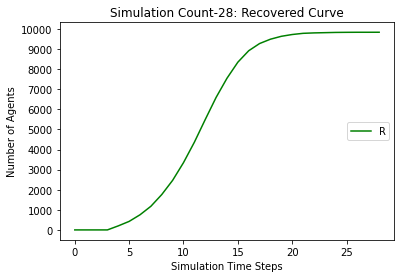

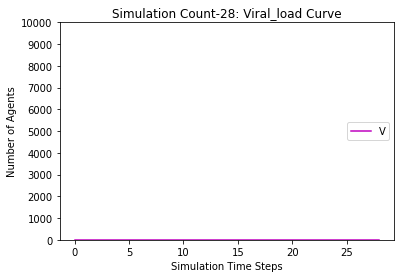

[9799, 9582, 9235, 8759, 8082, 7287, 6345, 5304, 4152, 3044, 2164, 1487, 984, 679, 470, 353, 294, 246, 214, 187, 179, 172, 168, 166, 164, 164, 162, 161, 161, 161, 161, 161]
[201, 418, 765, 1241, 1717, 2295, 2890, 3455, 3930, 4243, 4181, 3817, 3168, 2365, 1694, 1134, 690, 433, 256, 166, 115, 74, 46, 21, 15, 8, 6, 5, 3, 3, 1, 0]
[0, 0, 0, 0, 201, 418, 765, 1241, 1918, 2713, 3655, 4696, 5848, 6956, 7836, 8513, 9016, 9321, 9530, 9647, 9706, 9754, 9786, 9813, 9821, 9828, 9832, 9834, 9836, 9836, 9838, 9839]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[[], [9799, 9609, 9305, 8881, 8246, 7523, 6587, 5537, 4388, 3272, 2305, 1597, 1060, 710, 499, 363, 287, 232, 211, 183, 173, 165, 161, 154, 150, 149, 149, 149, 149, 149], [9799, 9603, 9281, 8821, 8225, 7506, 6600, 5577, 4522, 3504, 2588, 1874, 1328, 953, 690, 508, 408, 333, 282, 257, 233, 217, 210, 203, 198, 197, 197, 197, 197, 197

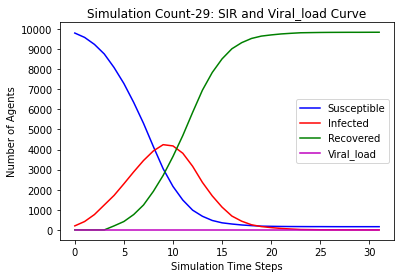

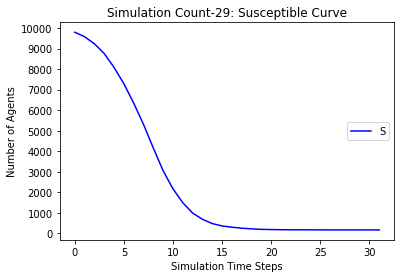

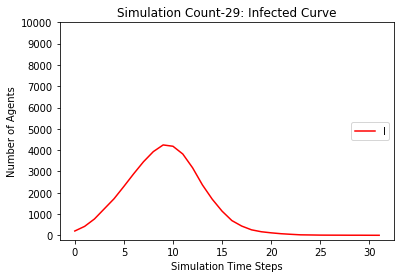

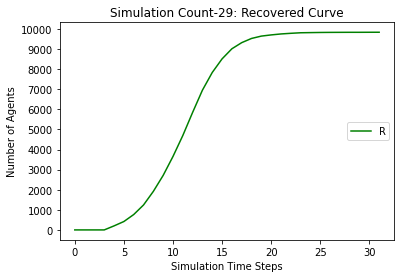

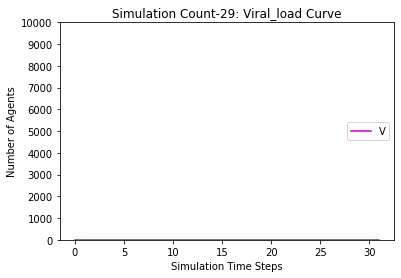

In [ ]:
SS,II,RR,VV,TT = [[]],[[]],[[]],[[]],[[]]
for i in range(100):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,V,T = [],[],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  V.append(Vj)
  T.append(j)

  while Ij > 0 or Vj >= 1 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    Sj,Ij,Rj,Vj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    V.append(Vj)
    T.append(j)
    
  print(S)
  print(I)
  print(R)
  print(V)
  SS.append(S)
  II.append(I)
  RR.append(R)
  VV.append(V)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  print(VV)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g',T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': SIR and Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Susceptible Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Infected Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Recovered Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

  plt.plot(T, V, 'm')
  plt.xlabel('Simulation Time Steps')
  plt.title('Simulation Count-'+str(i+1)+': Viral_load Curve')
  plt.ylabel('Number of Agents')
  plt.yticks(np.arange(0,K+1, K/10))
  plt.legend(("Viral_load"),loc='center right')
  plt.show()  

In [ ]:
SC = SS[1]
IC = II[1]
RC = RR[1]
VT = VV[1]
TC = TT[1]
for i in range(2,100):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  VT = [mean(i) for i in zip(VT,VV[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

print("Susceptible Average (100 Simulations):", SC)
print("Infected Average(100 Simulations):", IC)
print("Recovered Average(100 Simulations):", RC)
print("Viral_load Average(100 Simulations):", VT) 
print("Time Steps:", TC) 



plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g', TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: SIR and Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible", "Infected", "Recovered", "Viral_load"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Infected Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))

plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Recovered"),loc='center right')
plt.show()  

plt.plot(TC, VT, 'm')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Simulations: Viral_load Curve')
plt.ylabel('Number of Agents')
plt.yticks(np.arange(0,K+1, K/10))
plt.legend(("Viral_load"),loc='center right')
plt.show() 



  
